> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [1]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [2]:
def corr2d(X: np.array, K: np.array) -> np.array:

    # no padding for now and assume stride = 1

    Xx = X.shape[0]
    Xy = X.shape[1]
    Kx = K.shape[0]
    Ky = K.shape[1]
    result = np.zeros((Xx - Kx +1,Xy-Ky+1))
    for i in range(Xx - Kx +1) :
      
      for j in range(Xy - Ky +1) :
       
        result[i][j] = np.sum(K * X[ i:i+Kx,j:j+Ky ] )
    return result   




In [3]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [4]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    Xx = X.shape[1]
    Xy = X.shape[2]
    Kx = K.shape[1]
    Ky = K.shape[2]
    result = np.zeros((Xx - Kx +1,Xy-Ky+1))
    for i in range(Xx - Kx +1) :
      
      for j in range(Xy - Ky +1) :
       
        result[i][j] = np.sum(K * X[ :,i:i+Kx,j:j+Ky ] )
    return result  
     

In [5]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [10]:
# I haven't stacked using np.stack function but rather changed the dimensions of result array and ran a for loop for stacking part.
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    Xx = X.shape[1]
    Xy = X.shape[2]
    Kx = K.shape[2]
    Ky = K.shape[3]
    num_out_channels = K.shape[0]
    result = np.zeros((num_out_channels,Xx - Kx +1,Xy-Ky+1))
    for l in range(K.shape[0]) :
      result[l] = corr2d_multiple_input_channels(X,K[l])
    return result

    #Alternate

    '''import numpy as np

def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    num_kernels = K.shape[0]
    output = []

    for kernel in range(num_kernels):
        output.append(corr2d_multiple_input_channels(X, K[kernel]))

    return np.stack(output, axis=0)'''
    

    

In [11]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

**Computational benefits**
It reduces the number of computations by skipping intermediate values hence
Decreasing the spatial dimensions, leading to smaller feature maps which
Speeds up the processing time by reducing the number of operations.

**Statistical benefits**
By decreasing the spatial resolution, we can develop invariance to local variations and noise and our output is now aggregated over a larger region.

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [ ]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [ ]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K)
#print(K.shape)

print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [ ]:
X = X.reshape((1,6, 8,1)) # this will be the input to the model
Y = Y.reshape((1, 6, 7,1)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

In [ ]:
#Alternate but not giving that good result.
'''import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1, (1, 2), input_shape=X.shape[1:], use_bias=False))

# Compiling the model
model.compile(tf.keras.optimizers.SGD(learning_rate=lr), loss = 'mse',
                  metrics=['accuracy'])

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    model.fit(X, Y, epochs=1)  

    # Printing the kernel after each epoch
    kernel = model.get_weights()
    print(f"Epoch {epoch+1} - Kernel: {kernel}")'''


import tensorflow as tf    
# Just an another way to write the 2 lines that follows the commented code.
'''model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(1, (1, 2), use_bias=False)
])'''
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1, (1, 2), use_bias=False))


# Compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mse', metrics = ['accuracy'])

# Training the model
num_epochs = 100
for i in range(num_epochs) :
    model.fit(X, Y, epochs=1)

# Retrieve the learned kernel
    kernel = model.get_weights()[0]
    kernel = np.array(kernel).flatten()
    kernel = kernel.reshape((-1,2))

    print(f"Learned Kernel: {kernel}")    


1/1 [==============================] - 0s 401ms/step - loss: 1.2969 - accuracy: 0.7143
Learned Kernel: [[-0.6775566 -1.0174311]]
1/1 [==============================] - 0s 9ms/step - loss: 1.2229 - accuracy: 0.7143
Learned Kernel: [[-0.6475825 -0.9874717]]
1/1 [==============================] - 0s 8ms/step - loss: 1.1516 - accuracy: 0.7143
Learned Kernel: [[-0.61765295 -0.9575828 ]]
1/1 [==============================] - 0s 8ms/step - loss: 1.0830 - accuracy: 0.7143
Learned Kernel: [[-0.5877869 -0.9277958]]
1/1 [==============================] - 0s 12ms/step - loss: 1.0172 - accuracy: 0.7143
Learned Kernel: [[-0.55800426 -0.89814466]]
1/1 [==============================] - 0s 8ms/step - loss: 0.9541 - accuracy: 0.7143
Learned Kernel: [[-0.5283255 -0.8686651]]
1/1 [==============================] - 0s 9ms/step - loss: 0.8937 - accuracy: 0.7143
Learned Kernel: [[-0.49877176 -0.8393951 ]]
1/1 [==============================] - 0s 9ms/step - loss: 0.8362 - accuracy: 0.7143
Learned Kernel: [

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [ ]:

def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
    Xx , Xy = X.shape
    Kx, Ky = K
    X_output = int(Xx/Kx)
    Y_output = int(Xy/Ky)
    output = np.zeros((X_output, Y_output))
    for i in range(X_output) :
      for j in range(Y_output) :
        m = j*Kx
        n = m + Kx
        o = i*Ky
        p= o + Ky
        output[i][j]= np.max(X[o:p,m:n])
    return output    




In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


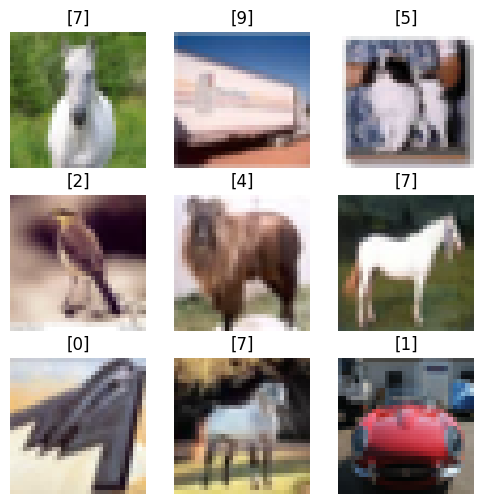

In [ ]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

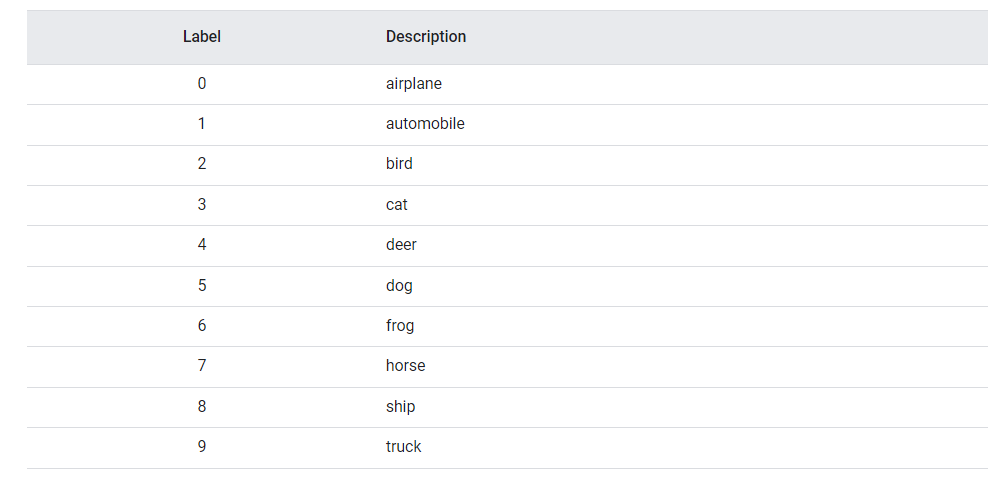

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [ ]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer: The Adam optimizer is a popular optimization algorithm used in deep learning for training neural networks. 
It is an extension of the stochastic gradient descent (SGD) optimizer that combines the concepts of adaptive
 learning rates and momentum(basically I understood from momentum as it takes into account mean(1st moment estimate)
  and variance(2nd moment estimate) of the computed gradients.) to achieve efficient and effective optimization.

Here's a high-level overview of the Adam optimizer:

1)Initialization: Initialize the first and second moment estimates, usually with zero values, for each parameter.
2)Compute gradients: Calculate the gradients of the parameters with respect to the loss function using techniques like backpropagation.
3)Update first and second moment estimates: Update the first-moment estimate by taking a weighted average of the current gradients
 and the previous first-moment estimate. Update the second-moment estimate by taking a weighted average of the squared gradients 
 and the previous second-moment estimate.
4)Bias correction: Adjust the first and second moment estimates to correct for their initialization bias.
5)Update parameters: Update the parameters by taking a step in the direction opposite to the gradients, scaled by the adaptive learning rate.

"""

"\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer: The Adam optimizer is a popular optimization algorithm used in deep learning for training neural networks. \nIt is an extension of the stochastic gradient descent (SGD) optimizer that combines the concepts of adaptive\n learning rates and momentum(basically I understood from momentum as it takes into account mean(1st moment estimate)\n  and variance(2nd moment estimate) of the computed gradients.) to achieve efficient and effective optimization.\n\nHere's a high-level overview of the Adam optimizer:\n\n1)Initialization: Initialize the first and second moment estimates, usually with zero values, for each parameter.\n2)Compute gradients: Calculate the gradients of the parameters with respect to the loss function using techniques like backpropagation.\n3)Update first and second moment estimates: Update the first-moment estimate by taking a weighted average of the current gradients\n and the

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
875/875 [==============================] - 5s 4ms/step - loss: 2.5204 - accuracy: 0.0970 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 2/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3025 - accuracy: 0.0994 - val_loss: 2.3033 - val_accuracy: 0.0954
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3025 - accuracy: 0.1026 - val_loss: 2.3029 - val_accuracy: 0.0993
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3031 - accuracy: 0.0991 - val_loss: 2.3046 - val_accuracy: 0.0956
Epoch 5/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3028 - val_accuracy: 0.0959
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3017 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.0960
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3015 - accuracy: 0.1021 - val_loss: 2.3025 - val_accuracy: 0.0963
Epoch 

In [ ]:
""" 
Write about validation accuracy in 100 words.
Answer :
We have split our training dataset into 2 parts - one which is used for training(here 80%) and one which is used for validation(here 20%).
Validation accuracy represents how accurately model can predict the images of the validation dataset after being trained from trained dataset.
basically, it is perecentage of accurate predictions out of total prediction in the validation dataset.


"""

' \nWrite about validation accuracy in 100 words.\nAnswer :\nWe have split our training dataset into 2 parts - one which is used for training(here 80%) and one which is used for validation(here 20%).\nValidation accuracy represents how accurately model can predict the images of the validation dataset after being trained from trained dataset.\nbasically, it is perecentage of accurate predictions out of total prediction in the validation dataset.\n\n\n'

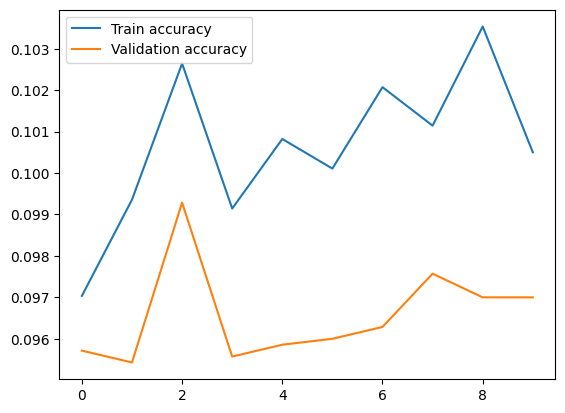

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 4s 5ms/step - loss: 0.8144 - accuracy: 0.7103 - val_loss: 1.8595 - val_accuracy: 0.5121
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 0.8213 - accuracy: 0.7079 - val_loss: 1.9310 - val_accuracy: 0.5019
Epoch 3/20
875/875 [==============================] - 4s 4ms/step - loss: 0.7777 - accuracy: 0.7234 - val_loss: 2.0520 - val_accuracy: 0.4839
Epoch 4/20
875/875 [==============================] - 4s 5ms/step - loss: 0.7504 - accuracy: 0.7351 - val_loss: 1.9243 - val_accuracy: 0.5040
Epoch 5/20
875/875 [==============================] - 4s 4ms/step - loss: 0.7241 - accuracy: 0.7428 - val_loss: 2.0998 - val_accuracy: 0.5031
Epoch 6/20
875/875 [==============================] - 4s 4ms/step - loss: 0.7085 - accuracy: 0.7486 - val_loss: 2.1875 - val_accuracy: 0.4926
Epoch 7/20
875/875 [==============================] - 5s 5ms/step - loss: 0.6960 - accuracy: 0.7551 - val_loss: 2.1052 - val_accuracy: 0.5003
Epoch 

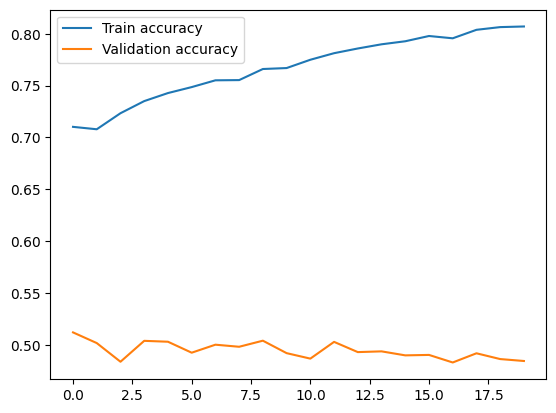

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.

"""

"\nDid our model improved??\nAre we done with the job?\nWhat is happening after 5( roughly ) epochs? Why is there a gap between\ntraining and validation accuracy?\n\nOur training accuracy reached to 0.73( and still increasing ) but \nthe validation accuracy seems to stagnate at 0.52.\n\nIs our model overfitting on the training data so much that it can't work well \non unseen data.\n"

The model is so well fitted by the training set that is it has memorized it so well that it performs poorly on the new unseen data. This is known as overfitting.

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

'\n[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not \nconsidered as cheating as long as you are writing that in your own word\n( only problem is the crediblity of its information)\n\n'

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: Source : Chat gpt, gfg
"""

'\nQuestion: What is overfitting and underfitting below ( atleast 200 words )\n\nAnswer: Source : Chat gpt, gfg\n'

**Overfitting**
Overfitting occurs when a model learns to fit the training data too closely, capturing both the patterns and the random variations in the data. In other words, the model becomes overly complex and starts to memorize the training examples instead of learning the general patterns. As a result, an overfit model performs well on the training data but fails to generalize well to new, unseen data. Signs of overfitting include excessively low training error and significantly higher test error or validation error.


**Underfitting**
Underfitting occurs when a model is too simple or lacks the capacity to capture the underlying patterns in the data. It fails to learn the relevant relationships and performs poorly both on the training data and new, unseen data.
It may be caused by using a model with low complexity or insufficient capacity to represent the underlying patterns or 
Insufficient training time or iterations that prevent the model from fully learning the relationships or
Inadequate features or representation of the data that do not capture the relevant information.

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: sources : chat gpt, javatpoint
"""

'\nQuestion: What are regularization techniques in machine learning?(200 words)\n\nAnswer: sources : chat gpt, javatpoint\n'

Regularization techniques in machine learning are methods used to prevent overfitting and improve the generalization performance of models. They introduce additional constraints or penalties to the model's learning process, discouraging or preventing it from excessively fitting the training data and promoting simpler or more robust solutions(What I mean by simpler is that it does not have to take into account each and every point because there are various points of high variations like from their neighbouring regions so taking them into account reduces the efficiency of the model) . Regularization techniques help to strike a balance between fitting the training data well and avoiding overemphasis on noise or irrelevant patterns.

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: sources : tensorflow.org, chatgpt
"""

'\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: sources : tensorflow.org, chatgpt\n'

Dropout is a regularization technique commonly used in deep learning. It randomly sets a fraction of the input units or neurons to zero(at a rate based on the rate specified) during each training iteration, effectively dropping them out of the network temporarily.One thing we have to keep in mind is that drop out should take place during training only not at the time if inferring so we have to do training = True.Also each of the remaining neurons are scaled up by a factor of 1/(1- rate). Dropout prevents the model from relying too heavily on specific neurons and encourages the learning of more robust and distributed representations. Basically, datapoints which were showing a high variation leading to noise- their effect leading to overfitting is reduced.

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: Sources : Chatgpt, neptune.ai
"""

'\nQuestion: What is L1 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: Sources : Chatgpt, neptune.ai\n'

L1 normalization is a technique used to normalize vectors by dividing each element of the vector by the sum of its absolute values. It is commonly used in machine learning and data preprocessing to scale features or data points.

The L1 normalization formula for a vector x with n elements is as follows:

L1 normalized vector, x' = x / ||x||1

Where:

x' is the L1 normalized vector.
x is the original vector.
|x||1 is the L1 norm of the vector x, which is the sum of the absolute values of its elements.
One thing which we need to see is that ||x|| is different from ||x||1 because in ||x|| we take square root of sum of squares!.
It basically turns the value of data points into probabilities with the sum of all the values equal to 1.


In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: Sources : chatgpt, neptune.ai
"""

'\nQuestion: What is L2 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: Sources : chatgpt, neptune.ai\n'

L2 normalization, also known as Euclidean normalization, is a technique used to normalize vectors by dividing each element of the vector by the Euclidean norm of the vector. It is commonly used in machine learning and data preprocessing to scale features or data points.

The L2 normalization formula for a vector x with n elements is as follows:

L2 normalized vector, x' = x / ||x||2. (||x||2 is same as ||x|| which we have read in our MTH courses :)

Where:

x' is the L2 normalized vector.
x is the original vector.
||x||2 is the L2 norm of the vector x, which is the square root of the sum of the squares of its elements.
In simpler terms, to compute the L2 normalized vector x', each element of the original vector x is divided by the square root of the sum of the squares of all elements in x.

The L2 normalization technique scales the vector such that the Euclidean norm or simply norm of the vector becomes 1.

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: Sources : chatgpt, datacamp.com
"""

'\nQuestion: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )\n\nAnswer: Sources : chatgpt, datacamp.com\n'

Data augmentation refers to the application of various transformations or modifications to the existing training data to create additional synthetic data samples. These techniques are widely used in machine learning to increase the diversity and quantity of the training data, which can lead to improved model performance and generalization.

The need for data augmentation arises from the fact that machine learning models often require a large amount of labeled training data to effectively learn patterns and make accurate predictions. However, acquiring such large amounts of labeled data can be costly, time-consuming, or even impractical in certain domains.

Data augmentation helps overcome the limitations of limited training data by generating new samples that are variations of the original data. Common data augmentation techniques include image transformations such as rotation, flipping, cropping, scaling, and adding noise. This technique is highly useful for GANs generator which has to make fake images on its own.






